**Understanding Global and Local Minimum**

Global Minimum:

A point $x^*$ is a global minimum if $p(x^*) ≤ p(x)$ for all $x ∈ Rn$.
$p(x^*) = c − (x^*)T Kx^*$.
Local Minimum:
A point $x^*$ is a local minimum if there exists a neighborhood
around $x^*$ such that p(x^*) ≤ p(x) for all x in that neighborhood.
- If K is positive definite, $x^*$ is a unique global minimum.
-  If K is only positive semi-definite, $x^*$ might not be unique.
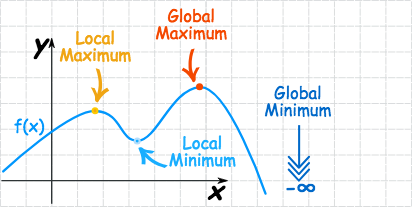


**Theorem:**
If the matrix $K$ is positive definite, then the quadratic function $p(x)$ has a unique global minimizer $x^*$ satisfying:
  \begin{equation*}
    K x^* = f.
  \end{equation*}
  
Key Cases:

- If $K$ is positive definite, then $p(x)$ has a unique global minimum at $x^*$.
- If $K$ is only positive semi-definite and $f \in \text{img}(K)$, then $p(x)$ has multiple global minima.
- If $K$ is not positive semi-definite or $f \notin \text{img}(K)$, then $p(x)$ has no global minimum.

Enter the dimension of matrix K (for plot, use 2): 2
Enter matrix K row by row (space-separated):
2 0
0 4
Enter vector f:
2 4

Matrix type: Positive Definite

✅ Unique global minimum exists at:
x* = [1. 1.]


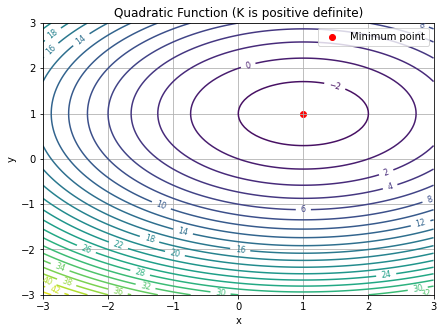

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Function to check matrix type based on eigenvalues ---
def check_matrix_type(K):
    eigenvalues = np.linalg.eigvals(K)
    if np.all(eigenvalues > 0):
        return "positive_definite"
    elif np.all(eigenvalues >= 0):
        return "positive_semidefinite"
    else:
        return "not_positive_semidefinite"

# --- Get inputs from user ---
n = int(input("Enter the dimension of matrix K (for plot, use 2): "))

print("Enter matrix K row by row (space-separated):")
K = np.array([list(map(float, input().split())) for _ in range(n)])

print("Enter vector f:")
f = np.array(list(map(float, input().split())))

# --- Check type of K ---
matrix_type = check_matrix_type(K)
print(f"\nMatrix type: {matrix_type.replace('_', ' ').title()}")

# --- If matrix is positive definite, compute the minimizer ---
if matrix_type == "positive_definite":
    x_star = np.linalg.solve(K, f)
    print("\n✅ Unique global minimum exists at:")
    print("x* =", x_star)
else:
    print("\n⚠️ For visualization, we still plot the function (but minimum may not exist).")
    try:
        x_star = np.linalg.solve(K, f)
    except np.linalg.LinAlgError:
        x_star = np.zeros(n)  # fallback if K is not invertible

# --- Plot only for 2D case ---
if n == 2:
    def p(x, y):
        """Quadratic function p(x,y) = 0.5*x^T K x - f^T x"""
        X = np.array([x, y])
        return 0.5 * X.T @ K @ X - f.T @ X

    # Create a grid of (x, y) points
    x_vals = np.linspace(-3, 3, 100)
    y_vals = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.zeros_like(X)

    # Evaluate p(x, y) for each grid point
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = p(X[i, j], Y[i, j])

    # --- Plot contour lines ---
    plt.figure(figsize=(7, 5))
    contours = plt.contour(X, Y, Z, levels=30)
    plt.clabel(contours, inline=True, fontsize=8)

    # Mark the minimum point (if meaningful)
    plt.scatter(x_star[0], x_star[1], color='red', label='Minimum point')
    plt.title(f"Quadratic Function (K is {matrix_type.replace('_', ' ')})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("\n Plotting is only supported for 2D case.")
